/content/drive/MyDrive/Colab Notebooks/cakoi
Found 1397 images belonging to 18 classes.
Found 5625 images belonging to 18 classes.
image batch shape:  (32, 224, 224, 3)
label batch shape:  (32, 18)
labels:  ['1. Kohaku' '10. Ginrin' '11. Goshiki' '12. Hikarimuji' '13. Hikarimoyo'
 '14. Kumonryu' '15. Kujaku' '16. Doitsu' '17. Chagoi' '18. Ochiba'
 '2. Taisho Sanke' '3. Showa ' '4.Utsuri' '5. Bekko' '6. Asagi'
 '7. Shusui' '8.Tancho' '9. Goromo']
match class:  {'1. Kohaku': 0, '10. Ginrin': 1, '11. Goshiki': 2, '12. Hikarimuji': 3, '13. Hikarimoyo': 4, '14. Kumonryu': 5, '15. Kujaku': 6, '16. Doitsu': 7, '17. Chagoi': 8, '18. Ochiba': 9, '2. Taisho Sanke': 10, '3. Showa ': 11, '4.Utsuri': 12, '5. Bekko': 13, '6. Asagi': 14, '7. Shusui': 15, '8.Tancho': 16, '9. Goromo': 17}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896     

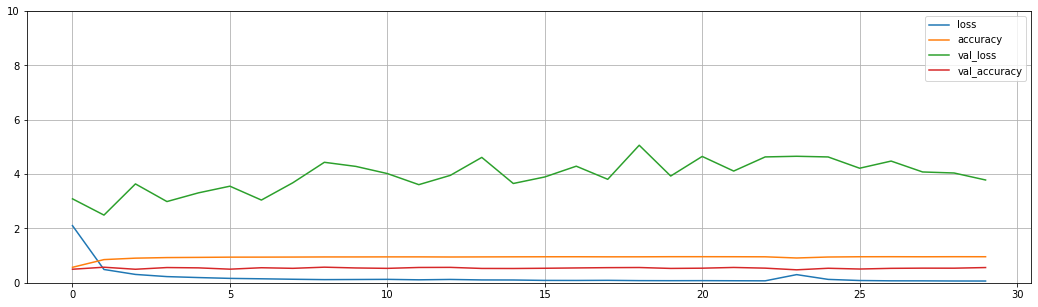

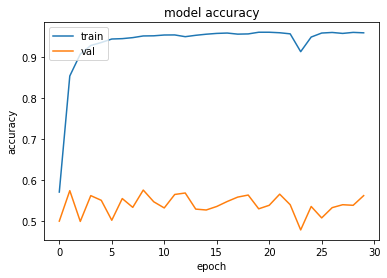

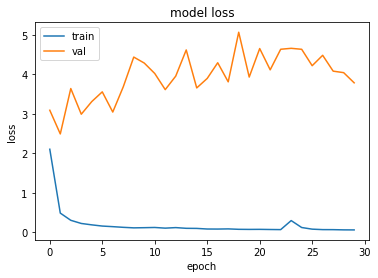

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras import datasets,layers,models
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
#from _future_ import absolute_import, division, print_function, unicode_literals
from keras.callbacks import ModelCheckpoint

dataset_path = '/content/drive/MyDrive/Colab Notebooks/cakoi'

image_size = (224,224)
TRAINING_DATA_DIR = str(dataset_path)
print(TRAINING_DATA_DIR)
# modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation
# validation data modify 
valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", shuffle=True, target_size=image_size)
# train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=image_size)
image_batch_train, label_batch_train = next(iter(train_generator))

print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

# Create layer model with CNN

model = Sequential()
model.add(Conv2D(224, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(112, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(18))
model.add(Activation("softmax"))


#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history1=model.fit(train_generator,epochs=30,batch_size=64,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

frame = "/content/drive/MyDrive/Colab Notebooks/cakoi/wieght_cc.hdf5"
model.save_weights(frame, overwrite = True )

# Save model
model.save('/content/drive/MyDrive/Colab Notebooks/cakoi/model_cc.h5')

# danh gia do chinh xac cua CNN
score = model1.evaluate(train_generator, verbose = 0)
print('sai so kiem tra la: ', score[0])
print('do chinh xac kiem tra la: ', score[1])

# Diagram
pd.DataFrame(history1.history).plot(figsize = (18,5))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load model đã train
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/cakoi/model_cc.h5')

In [ ]:
#Tạo lớp train model
classes = ['Kohaku','Ginrin', 'Goshiki', 'Hikarimuji', 'Hikarimoyo','Kumonryu', 'Kujaku', 'Doitsu', 'Chagoi',
           'Ochiba', 'Taisho Sanke', 'Showa ', 'Utsuri', 'Bekko', 'Asagi', 'Shusui', 'Tancho', 'Goromo']

[[1.8341967e-04 1.7447789e-01 1.3079062e-03 3.1777592e-05 4.5830137e-04
  1.4029612e-01 1.1005297e-03 2.2227250e-03 3.1259228e-02 8.3531123e-03
  6.5250355e-03 8.3092470e-03 1.6503283e-01 4.3400165e-01 1.2124249e-03
  2.1734381e-02 1.4118500e-03 2.0815507e-03]]


'Bekko'

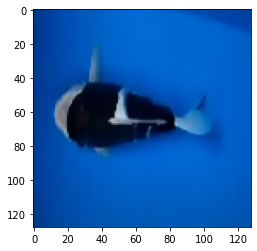

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
#Test dữ liệu
img=load_img('/content/drive/MyDrive/Colab Notebooks/cakoi/data/test/5. Bekko/1 001.jpg',target_size=(224,224,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
#result=model.predict(img)
print(model.predict(img))

classes[int(np.argmax(model.predict(img), axis=1))]